In [46]:
#from iql import run_training
from iql_gym import run_training
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os 
import datetime
from pprint import pprint
from distutils.util import strtobool
import argparse 
import yaml
from dict_hash import dict_hash
import numpy as np
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(rc={'figure.figsize':(4,3)})
from scipy.ndimage import gaussian_filter1d
import itertools
import pprint


In [47]:
!ls

archives      iql_gym.py   simultaneous_env_copy.py  water_bomber_gym.py
cmd.txt       iql.py	   simultaneous_env.py
config	      __pycache__  visualisation.ipynb
eval_prio.py  run_smac.py  water_bomber_env.py


In [48]:
path = Path("/home/nono/Documents/Dassault/Water-Bomber-Env/results/2023-08-22_18:25:02-env_id-batch_size")

In [49]:
with open(Path('config/simultaneous/default.yaml')) as f:
    params = yaml.safe_load(f)

with open(path/'params_const.yaml', 'r') as f:
    params_const = yaml.safe_load(f)

with open(path/'params_list_choice.yaml', 'r') as f:
    params_list_choice = yaml.safe_load(f)

results_df = pd.read_csv(path/ 'eval_prio.csv')

modified_params = list(params_list_choice.keys())
modified_params

['batch_size']

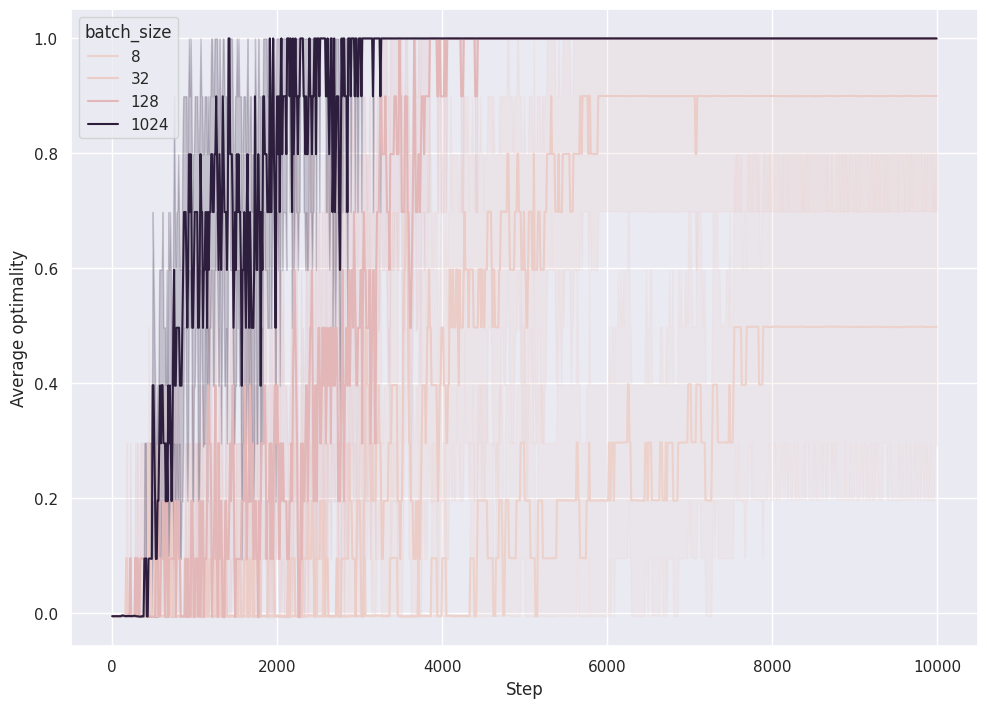

In [50]:
def plot_df(results_df):
  sns.lineplot(x="Step", y="Average optimality",
             hue=modified_params[0], style=modified_params[1] if len(modified_params) > 1 else None,
             data=results_df, errorbar=('ci', 90))
  plt.show()

plot_df(results_df)
#plt.savefig(path/'eval_prio.svg', format='svg')

In [51]:
#results_df[results_df['batch_size']==1024].plot(x='Step', y='Average optimality', '*')

In [52]:
results_df[results_df['batch_size']==1024].describe()#['Average optimality']

,Average optimality,Run,Step,batch_size
count,10000.000000,10000.000000,10000.000000,10000.0
mean,0.882534,4.500000,4995.000000,1024.0
std,0.323030,2.872425,2886.894251,0.0
min,-0.006890,0.000000,0.000000,1024.0
25%,1.000000,2.000000,2497.500000,1024.0
50%,1.000000,4.500000,4995.000000,1024.0
75%,1.000000,7.000000,7492.500000,1024.0
max,1.000000,9.000000,9990.000000,1024.0


In [53]:
results_df[results_df['batch_size']==1024][results_df['Step']==0]

/tmp/ipykernel_1479658/486171145.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df[results_df['batch_size']==1024][results_df['Step']==0]


,Average optimality,Run,Step,batch_size
3000,-0.004921,0,0,1024
7000,-0.004921,1,0,1024
11000,-0.001969,2,0,1024
15000,-0.002953,3,0,1024
19000,-0.005906,4,0,1024
23000,-0.004921,5,0,1024
27000,-0.004921,6,0,1024
31000,-0.004921,7,0,1024
35000,-0.006890,8,0,1024
39000,-0.004921,9,0,1024


In [54]:
results_df[results_df['batch_size']==1024][results_df['Run']==0]

/tmp/ipykernel_1479658/501442311.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df[results_df['batch_size']==1024][results_df['Run']==0]


,Average optimality,Run,Step,batch_size
3000,-0.004921,0,0,1024
3001,-0.004921,0,10,1024
3002,-0.004921,0,20,1024
3003,-0.004921,0,30,1024
3004,-0.004921,0,40,1024
...,...,...,...,...
3995,1.000000,0,9950,1024
3996,1.000000,0,9960,1024
3997,1.000000,0,9970,1024
3998,1.000000,0,9980,1024


In [55]:
list(itertools.product(*params_list_choice.values()))

[(8,), (32,), (128,), (1024,)]

In [56]:
modified_params = list(params_list_choice.keys())
for run in range(10):
  for param_values in itertools.product(*params_list_choice.values()):
    mask = results_df['Run']==run
    for mod_param, param_value in zip(modified_params, param_values):
      mask &= results_df[mod_param]==param_values
    #print(mask)
    #print(results_df[mask])
    results_df[mask]['Average optimality'] = gaussian_filter1d(results_df[mask]['Average optimality'], mode='nearest', sigma=2)

/tmp/ipykernel_1479658/3558442498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df[mask]['Average optimality'] = gaussian_filter1d(results_df[mask]['Average optimality'], mode='nearest', sigma=2)


In [57]:
sns.lineplot(x="Step", y="Average optimality",
             hue=modified_params[0], style=modified_params[1],
             data=results_df, errorbar=('ci', 90))

IndexError: list index out of range

In [ ]:
d = params_list_choice

In [ ]:
d['a'] = []
d.values()

dict_values([[8, 32, 128, 1024], []])

In [ ]:
list(itertools.product(*d.values()))

[]